In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
data_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
titanic = pd.read_csv(data_url)

# Drop irrelevant columns
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Convert categorical variables to numerical
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[91 14]
 [18 56]]


   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
PassengerId      0
Survived         0
Pclass           0
Name             0


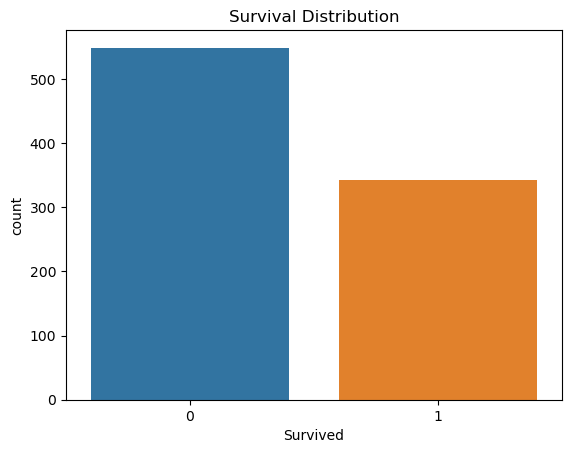

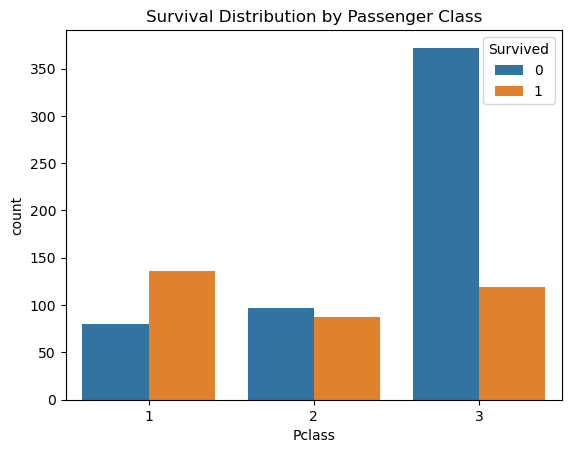

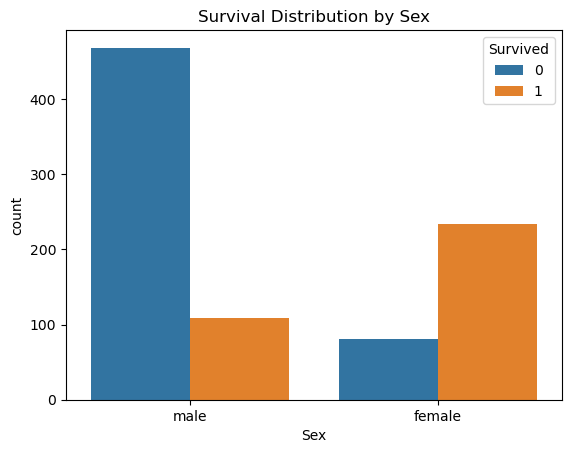

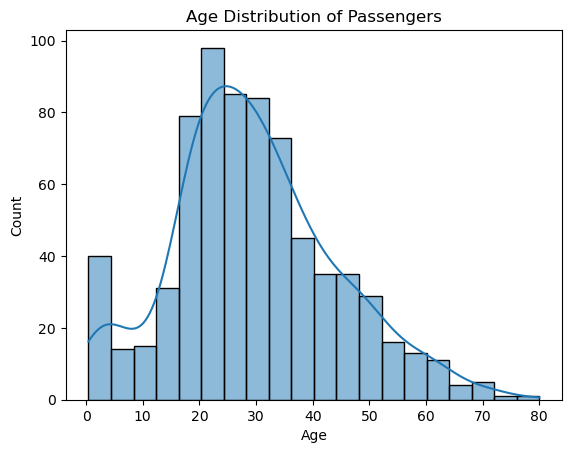

In [3]:



data_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
titanic = pd.read_csv(data_url)


print(titanic.head())


print(titanic.isnull().sum())


sns.countplot(x='Survived', data=titanic)
plt.title('Survival Distribution')
plt.show()


sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Distribution by Passenger Class')
plt.show()


sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Distribution by Sex')
plt.show()


sns.histplot(titanic['Age'].dropna(), bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers')
plt.show()


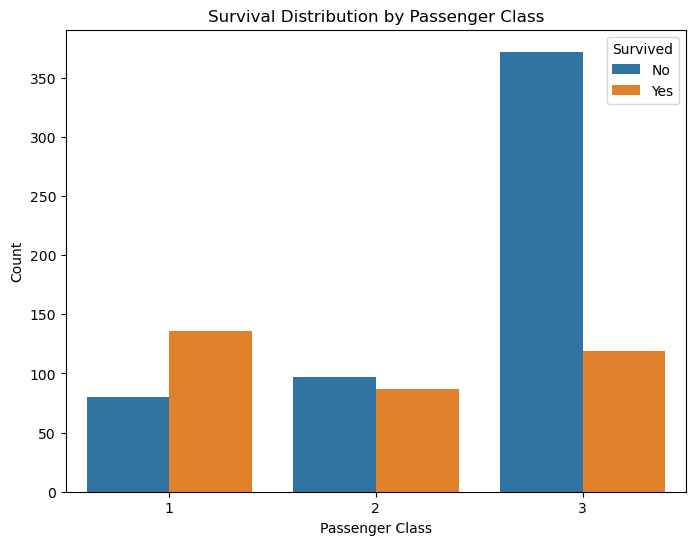

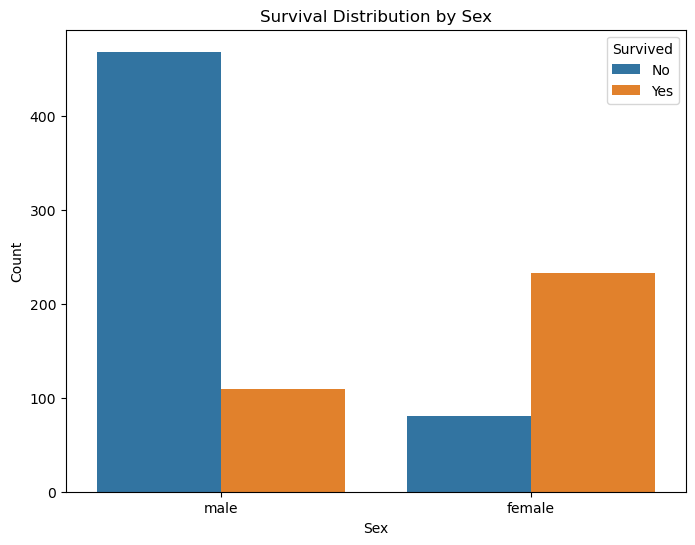

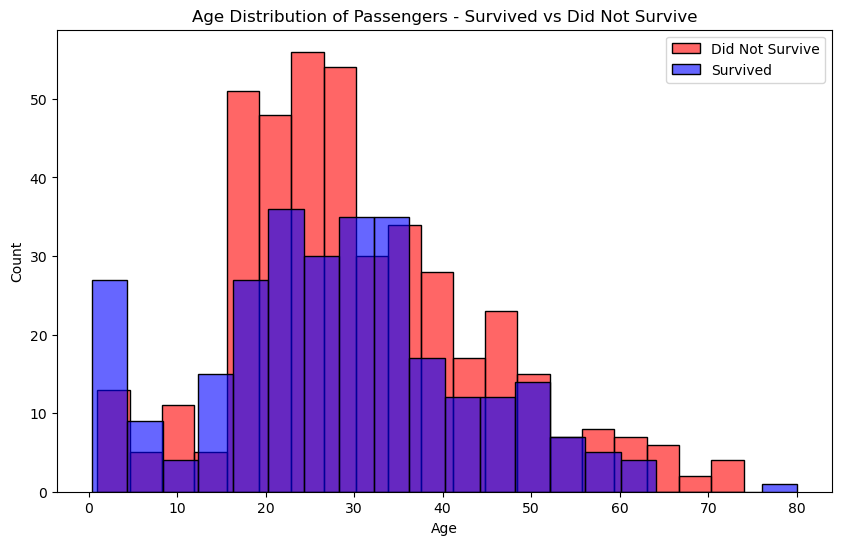

In [4]:



data_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
titanic = pd.read_csv(data_url)


plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Visualize the survival distribution based on sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Visualize the age distribution of passengers who survived and did not survive
plt.figure(figsize=(10, 6))
sns.histplot(titanic[titanic['Survived'] == 0]['Age'].dropna(), bins=20, color='red', alpha=0.6, label='Did Not Survive')
sns.histplot(titanic[titanic['Survived'] == 1]['Age'].dropna(), bins=20, color='blue', alpha=0.6, label='Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers - Survived vs Did Not Survive')
plt.legend()
plt.show()


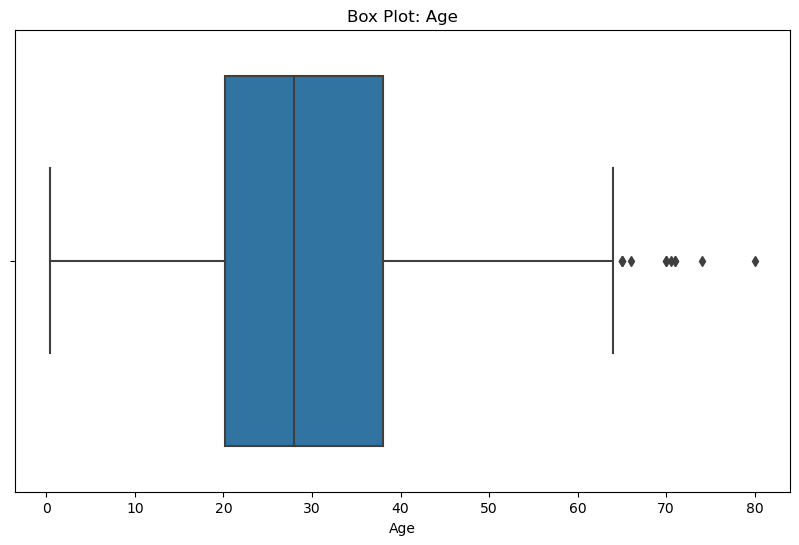

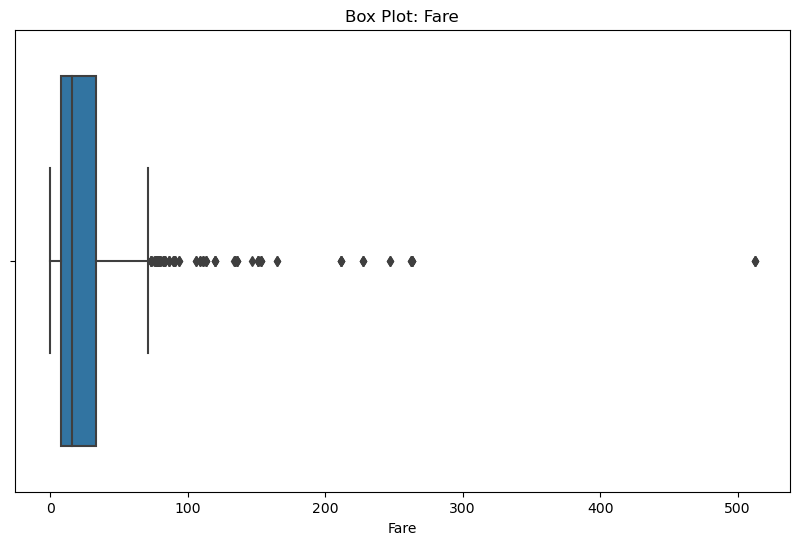

In [6]:



data_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
titanic = pd.read_csv(data_url)


titanic.dropna(subset=['Age', 'Fare'], inplace=True)


plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=titanic)
plt.title('Box Plot: Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=titanic)
plt.title('Box Plot: Fare')
plt.show()


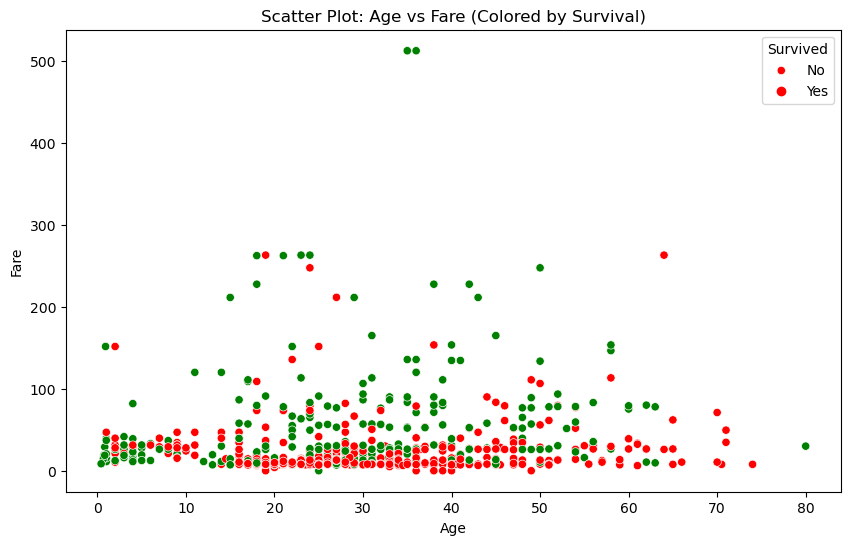

In [7]:


data_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv"
titanic = pd.read_csv(data_url)


titanic.dropna(subset=['Age', 'Fare'], inplace=True)

# Define the color palette for the scatter plot (0 = Not Survived, 1 = Survived)
color_palette = {0: 'red', 1: 'green'}

#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', palette=color_palette, data=titanic)
plt.title('Scatter Plot: Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
